#### Import Required Libraries
Import necessary libraries such as pandas, numpy, seaborn, matplotlib, and scikit-learn.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Load and Explore Dataset
Load the dataset into a pandas DataFrame and display the first few rows, check for missing values, display basic statistics, and data types of each column.

In [2]:
# Load and Explore Dataset

df = pd.read_csv('car driving risk analysis 2.csv')
df.head()


,speed,car_age,experience,risk
0,200,15,5,85
1,90,17,13,20
2,165,12,4,93
3,110,20,Nan,60
4,140,5,3,82


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 speed         0
car_age       0
experience    0
risk          0
dtype: int64


In [4]:
# Display basic statistics of the dataset
basic_stats = df.describe()
print("Basic statistics of the dataset:\n", basic_stats)

Basic statistics of the dataset:
             speed    car_age       risk
count    6.000000   6.000000   6.000000
mean   136.666667  11.833333  58.333333
std     40.455737   7.026142  35.443852
min     90.000000   2.000000  10.000000
25%    111.250000   6.750000  30.000000
50%    127.500000  13.500000  71.000000
75%    158.750000  16.500000  84.250000
max    200.000000  20.000000  93.000000


In [5]:
# Display the data types of each column
data_types = df.dtypes
print("Data types of each column:\n", data_types)

Data types of each column:
 speed          int64
car_age        int64
experience    object
risk           int64
dtype: object


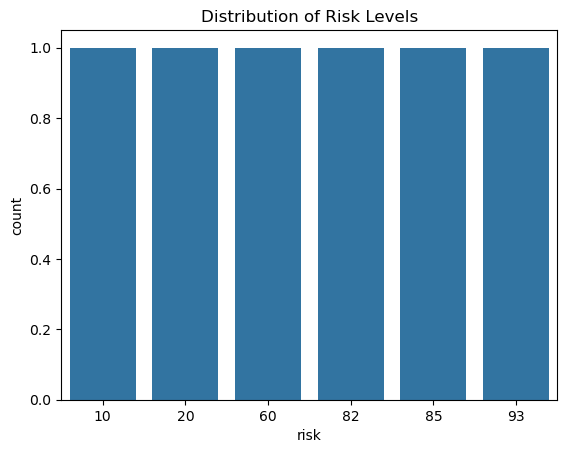

In [6]:
# Visualize the distribution of the target variable
sns.countplot(x='risk', data=df)
plt.title('Distribution of Risk Levels')
plt.show()

#### Data Preprocessing
Handle missing values, encode categorical variables if any, and normalize/scale the data if necessary.

In [7]:
# Data Preprocessing

# Handle missing values by filling them with the mean of the column
# Convert 'experience' column to numeric, coercing errors to NaN
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')

# Handle missing values by filling them with the mean of the column
df['experience'].fillna(df['experience'].mean(), inplace=True)

# Normalize/scale the data if necessary
from sklearn.preprocessing import StandardScaler

# Select the features and target variable
features = df[['speed', 'car_age', 'experience']]
target = df['risk']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled DataFrame
scaled_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_7552\869409859.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience'].fillna(df['experience'].mean(), inplace=True)


,speed,car_age,experience
0,1.714916,0.493715,-4.853687e-01
1,-1.263622,0.805535,1.941475e+00
2,0.767199,0.025985,-7.887242e-01
3,-0.722070,1.273264,-2.694338e-16
4,0.090259,-1.065384,-1.092080e+00


#### Exploratory Data Analysis (EDA)
Visualize the distribution of the target variable and explore relationships between features using plots.

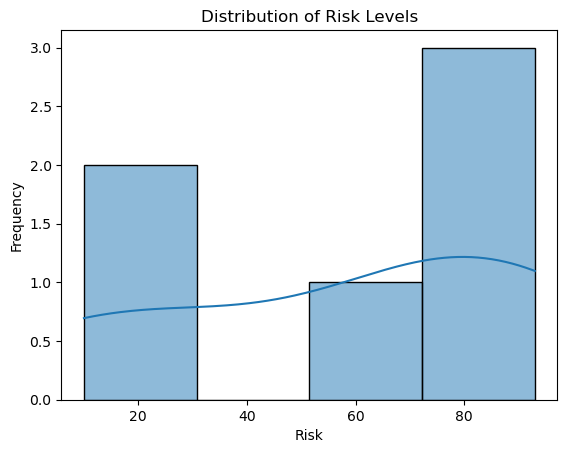

In [8]:
# Exploratory Data Analysis (EDA)

# Visualize the distribution of the target variable
sns.histplot(df['risk'], kde=True)
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk')
plt.ylabel('Frequency')
plt.show()

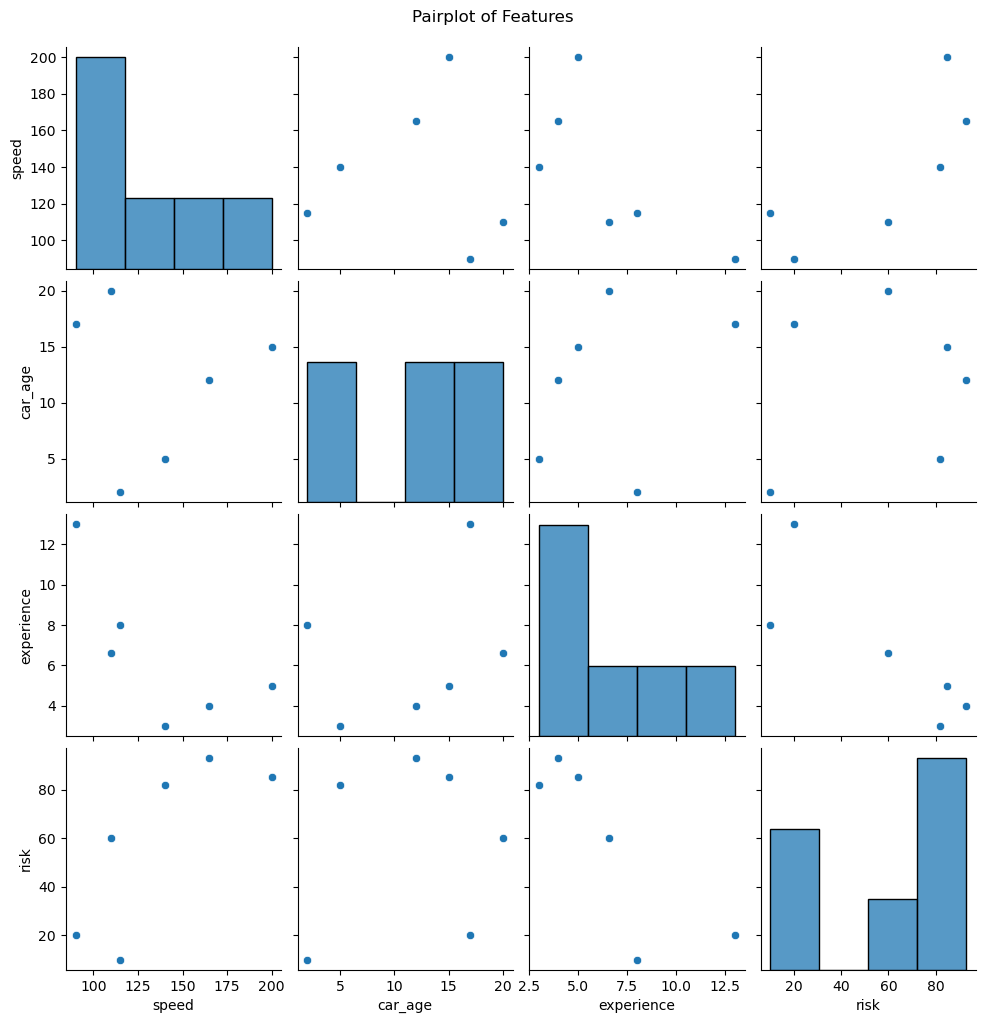

In [9]:
# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

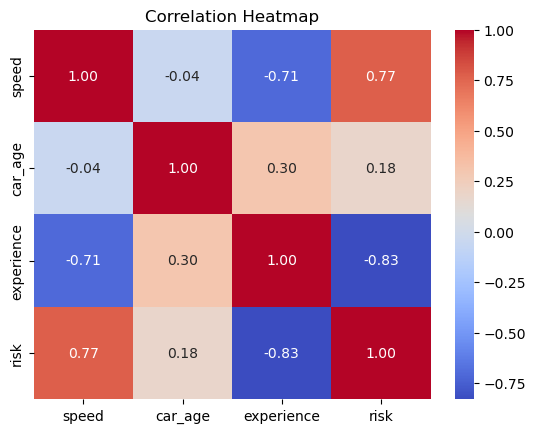

In [10]:
# Correlation heatmap to explore relationships between features
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

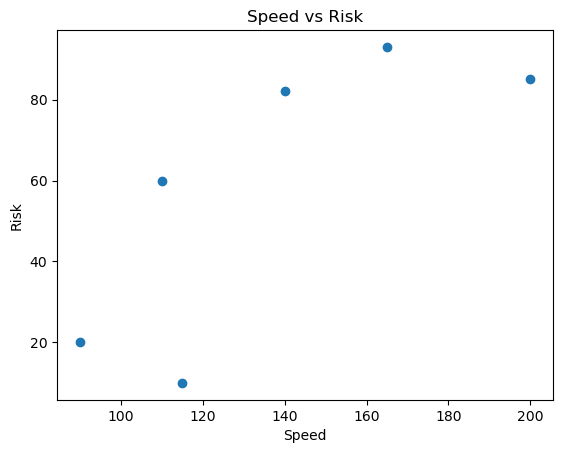

In [11]:
# Scatter plot of speed vs risk
plt.scatter(df['speed'], df['risk'])
plt.title('Speed vs Risk')
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.show()

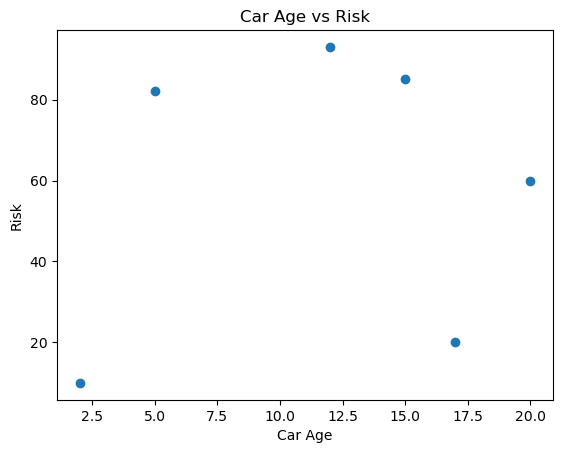

In [12]:
# Scatter plot of car_age vs risk
plt.scatter(df['car_age'], df['risk'])
plt.title('Car Age vs Risk')
plt.xlabel('Car Age')
plt.ylabel('Risk')
plt.show()

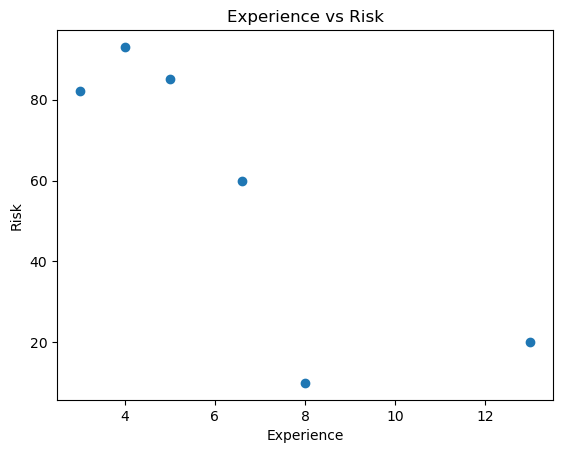

In [13]:
# Scatter plot of experience vs risk
plt.scatter(df['experience'], df['risk'])
plt.title('Experience vs Risk')
plt.xlabel('Experience')
plt.ylabel('Risk')
plt.show()

#### Feature Engineering
Create new features or modify existing ones to improve model performance.

In [14]:
# Feature Engineering

# Create a new feature: speed to car age ratio
df['speed_car_age_ratio'] = df['speed'] / df['car_age']

# Create a new feature: speed to experience ratio
df['speed_experience_ratio'] = df['speed'] / df['experience']

# Create a new feature: car age to experience ratio
df['car_age_experience_ratio'] = df['car_age'] / df['experience']
df.head()

,speed,car_age,experience,risk,speed_car_age_ratio,speed_experience_ratio,car_age_experience_ratio
0,200,15,5.0,85,13.333333,40.000000,3.000000
1,90,17,13.0,20,5.294118,6.923077,1.307692
2,165,12,4.0,93,13.750000,41.250000,3.000000
3,110,20,6.6,60,5.500000,16.666667,3.030303
4,140,5,3.0,82,28.000000,46.666667,1.666667


In [15]:
# Handle any potential infinite values resulting from division by zero
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any new missing values with the mean of the respective columns
df.fillna(df.mean(), inplace=True)

In [16]:
df.head()

,speed,car_age,experience,risk,speed_car_age_ratio,speed_experience_ratio,car_age_experience_ratio
0,200,15,5.0,85,13.333333,40.000000,3.000000
1,90,17,13.0,20,5.294118,6.923077,1.307692
2,165,12,4.0,93,13.750000,41.250000,3.000000
3,110,20,6.6,60,5.500000,16.666667,3.030303
4,140,5,3.0,82,28.000000,46.666667,1.666667
